In [30]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import random
import json
import time
sb.set() # set the default Seaborn style for graphics
comparison_count = 0# global comparison counter

In [31]:
# #MergeSort method
# def Merge_Sort_Split_Func(array):

#     #Nothing in array
#     if len(array) <= 1:
#         return array

#     #1) Split the array into left and right first
#     middle = len(array) // 2
#     left_side_array = array[:middle]
#     right_side_array = array[middle:]

#     #2) Recursively split and sort the left side first
#     leftside_splitsort = Merge_Sort_Split_Func(left_side_array)
#     #3) Then recursively split and sort the right side
#     rightside_splitsort = Merge_Sort_Split_Func(right_side_array)

#     #4) Once the left and right sides are sucessfully split proceed to merge
#     return Merge(leftside_splitsort, rightside_splitsort)

# #MergeSort merge method
# def Merge(leftside_splitsort, rightside_splitsort):

#     global comparison_count
#     #Initialize array list var to store and return the final sorted result
#     #and the 'x' , 'y' indexers
#     sortedArray = []
#     x = y = 0

#     #1) Loop is done to compare elements from both sides
#     while x < len(leftside_splitsort) and y < len(rightside_splitsort):
#         comparison_count += 1
#         #2) If left element is smaller than the right side,
#         #   append the left element
#         if leftside_splitsort[x] < rightside_splitsort[y]:
#             sortedArray.append(leftside_splitsort[x])
#             x += 1
#         #3) Otherwise append right element
#         else:
#             sortedArray.append(rightside_splitsort[y])
#             y += 1

#     #4) Append any remaining elements in either list
#     #   (as one might've been completely traversed)
#     sortedArray.extend(leftside_splitsort[x:])
#     sortedArray.extend(rightside_splitsort[y:])

#     return sortedArray


def Merge_Sort_Split_Func(array, start=0, end=None):
    if end is None:
        end = len(array)

    # Base case: single element array is already sorted
    if end - start <= 1:
        return array[start:end]

    # Find the middle index
    middle = (start + end) // 2

    # Recursively split and sort
    leftside_splitsort = Merge_Sort_Split_Func(array, start, middle)
    rightside_splitsort = Merge_Sort_Split_Func(array, middle, end)

    # Merge the sorted halves
    return Merge(leftside_splitsort, rightside_splitsort)

def Merge(leftside_splitsort, rightside_splitsort):
    global comparison_count

    sortedArray = []
    x = y = 0

    # Compare elements from both sides and merge
    while x < len(leftside_splitsort) and y < len(rightside_splitsort):
        comparison_count += 1
        if leftside_splitsort[x] < rightside_splitsort[y]:
            sortedArray.append(leftside_splitsort[x])
            x += 1
        else:
            sortedArray.append(rightside_splitsort[y])
            y += 1

    # Append remaining elements from both lists
    sortedArray.extend(leftside_splitsort[x:])
    sortedArray.extend(rightside_splitsort[y:])

    return sortedArray


In [32]:
# #InsertionSort Method
# def Insertion_Sort(array):
#     global comparison_count
#     arrNum = len(array)

#     #Nothing in array
#     if arrNum == 0:
#         return array

#     #1)Outer loop will loop through the array starting from index 1,
#     #  it will use index 1 as the initial key comparer and iterate accordingly
#     for i in range(1, arrNum):
#         #2)Inner loop is used to traverse each element and
#         #  compare with initial comparer
#         for j in range(i, 0, -1):
#             comparison_count += 1
#             #3)Swap adjacent elements if they are in the wrong order
#             if array[j] < array[j - 1]:
#                 swap(array, j, j - 1)
#             else:
#                 break

#     return array

# # Swap function to exchange elements in the array
# def swap(array, x, y):
#     temp = array[y]
#     array[y] = array[x]
#     array[x] = temp

def Insertion_Sort(array):
    global comparison_count
    arrNum = len(array)

    # Nothing in array
    if arrNum == 0:
        return array

    #1)Outer loop will loop through the array starting from index 1,
    for i in range(1, arrNum):
        key = array[i]
        j = i - 1
        #2)Inner loop is used to traverse each element and
         #compare with initial comparer
        while j >= 0 and array[j] > key:
            comparison_count += 1
            array[j + 1] = array[j]
            j -= 1 # decrement

        array[j + 1] = key

    return array


In [33]:
#Test Sorting Methods
def test_sort():
    test_cases = [
        {
            "input": [38, 27, 43, 3, 9, 82, 10],
            "expected": [3, 9, 10, 27, 38, 43, 82],
            "description": "Unsorted array"
        },
        {
            "input": [1, 2, 3, 4, 5],
            "expected": [1, 2, 3, 4, 5],
            "description": "Already sorted array"
        },
        {
            "input": [5, 4, 3, 2, 1],
            "expected": [1, 2, 3, 4, 5],
            "description": "Reverse sorted array"
        },
        {
            "input": [3, 1, 2, 1, 3, 2],
            "expected": [1, 1, 2, 2, 3, 3],
            "description": "Array with duplicates"
        },
        {
            "input": [],
            "expected": [],
            "description": "Empty array"
        },
        {
            "input": [42],
            "expected": [42],
            "description": "Single element array"
        }
    ]

    # Run each test case
    for case in test_cases:
        input_data = case["input"]
        expected_output = case["expected"]
        description = case["description"]

        output = Merge_Sort_Split_Func(input_data)
        assert output == expected_output, f"Test failed for {description}: Expected {expected_output} but got {output}"
        print(f"Merge Sort Test passed for {description}: {input_data} -> {output} \n")

    for case in test_cases:
        input_data = case["input"]
        expected_output = case["expected"]
        description = case["description"]

        output = Insertion_Sort(input_data)
        assert output == expected_output, f"Test failed for {description}: Expected {expected_output} but got {output}"
        print(f"Insertion Sort Test passed for {description}: {input_data} -> {output} \n")

# Call the test function
if __name__ == "__main__":
    test_sort()

Merge Sort Test passed for Unsorted array: [38, 27, 43, 3, 9, 82, 10] -> [3, 9, 10, 27, 38, 43, 82] 

Merge Sort Test passed for Already sorted array: [1, 2, 3, 4, 5] -> [1, 2, 3, 4, 5] 

Merge Sort Test passed for Reverse sorted array: [5, 4, 3, 2, 1] -> [1, 2, 3, 4, 5] 

Merge Sort Test passed for Array with duplicates: [3, 1, 2, 1, 3, 2] -> [1, 1, 2, 2, 3, 3] 

Merge Sort Test passed for Empty array: [] -> [] 

Merge Sort Test passed for Single element array: [42] -> [42] 

Insertion Sort Test passed for Unsorted array: [3, 9, 10, 27, 38, 43, 82] -> [3, 9, 10, 27, 38, 43, 82] 

Insertion Sort Test passed for Already sorted array: [1, 2, 3, 4, 5] -> [1, 2, 3, 4, 5] 

Insertion Sort Test passed for Reverse sorted array: [1, 2, 3, 4, 5] -> [1, 2, 3, 4, 5] 

Insertion Sort Test passed for Array with duplicates: [1, 1, 2, 2, 3, 3] -> [1, 1, 2, 2, 3, 3] 

Insertion Sort Test passed for Empty array: [] -> [] 

Insertion Sort Test passed for Single element array: [42] -> [42] 



In [34]:
#Hybrid sort

def Hybrid_Merge_Sort(array, S):
    global comparison_count
    if len(array) <= S:
        return Insertion_Sort(array)

    middle = len(array) // 2
    left_side_array = array[:middle]
    right_side_array = array[middle:]

    leftside_splitsort = Hybrid_Merge_Sort(left_side_array, S)
    rightside_splitsort = Hybrid_Merge_Sort(right_side_array, S)

    return Merge(leftside_splitsort, rightside_splitsort)



In [35]:
#data generator

def generate_data(size, max_value):
    return [random.randint(1, max_value) for _ in range(size)]


# **With the value of S fixed, plot the number of key comparisons over different sizes of the input list n**

Input size: 1000, Key comparisons: 12587
Input size: 5000, Key comparisons: 62859
Input size: 10000, Key comparisons: 135783
Input size: 50000, Key comparisons: 838011
Input size: 100000, Key comparisons: 1776728
Input size: 500000, Key comparisons: 10665984
Input size: 1000000, Key comparisons: 22315237


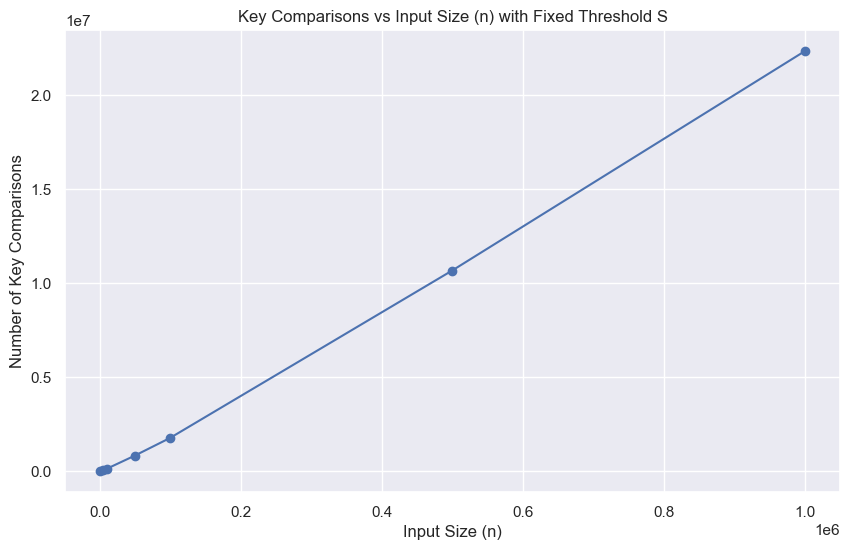

In [36]:
S = 32

sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]

comparisons_by_size = []

for size in sizes:
    data = generate_data(size, size)
    comparison_count = 0
    Hybrid_Merge_Sort(data, S)
    comparisons_by_size.append(comparison_count)
    print(f"Input size: {size}, Key comparisons: {comparison_count}")

plt.figure(figsize=(10, 6))
plt.plot(sizes, comparisons_by_size, marker='o', linestyle='-', color='b')
plt.title('Key Comparisons vs Input Size (n) with Fixed Threshold S')
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Key Comparisons')
plt.grid(True)
plt.show()

# **With the input size n fixed, plot the number of key comparisons over different values of S**

Threshold S: 1, Key comparisons: 120435
Threshold S: 2, Key comparisons: 118409
Threshold S: 3, Key comparisons: 117249
Threshold S: 4, Key comparisons: 117024
Threshold S: 5, Key comparisons: 116265
Threshold S: 6, Key comparisons: 116141
Threshold S: 7, Key comparisons: 116177
Threshold S: 8, Key comparisons: 116002
Threshold S: 9, Key comparisons: 116734
Threshold S: 10, Key comparisons: 120193
Threshold S: 11, Key comparisons: 119970
Threshold S: 12, Key comparisons: 119993
Threshold S: 13, Key comparisons: 119944
Threshold S: 14, Key comparisons: 119942
Threshold S: 15, Key comparisons: 120024
Threshold S: 16, Key comparisons: 120120
Threshold S: 17, Key comparisons: 120247
Threshold S: 18, Key comparisons: 120182
Threshold S: 19, Key comparisons: 126179
Threshold S: 20, Key comparisons: 136126
Threshold S: 21, Key comparisons: 135781
Threshold S: 22, Key comparisons: 135329
Threshold S: 23, Key comparisons: 135671
Threshold S: 24, Key comparisons: 135240
Threshold S: 25, Key comp

<Figure size 1200x600 with 0 Axes>

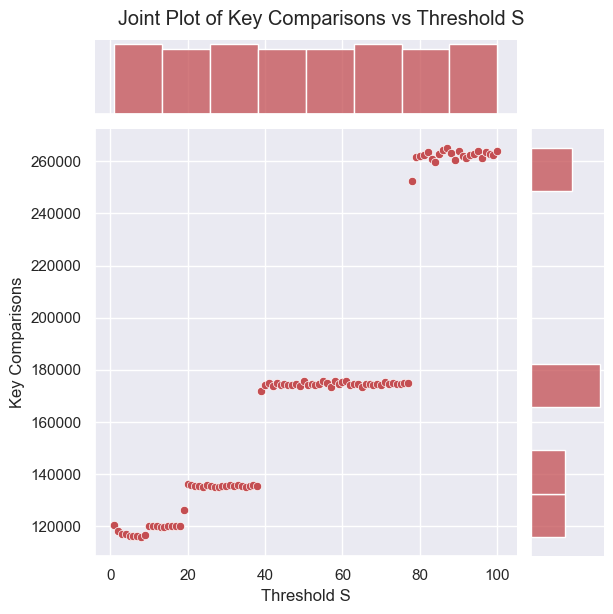

In [37]:
fixed_size = 10000

threshold_values = list(range(1, 101))

comparisons_by_threshold = []

for S in threshold_values:
    data = generate_data(fixed_size, fixed_size)
    comparison_count = 0
    Hybrid_Merge_Sort(data, S)
    comparisons_by_threshold.append(comparison_count)
    print(f"Threshold S: {S}, Key comparisons: {comparison_count}")

plt.figure(figsize=(12, 6))
sb.jointplot(data=pd.DataFrame({
    'Threshold S': threshold_values,
    'Key Comparisons': comparisons_by_threshold
}), x='Threshold S', y='Key Comparisons', kind='scatter', color='r')
plt.suptitle('Joint Plot of Key Comparisons vs Threshold S', y=1.02)
plt.show()

In [38]:
input_sizes = [1000, 5000, 10000, 50000, 100000,10000000]  # You can add more sizes if needed
threshold_values = list(range(1, 101))

optimal_S_values = []

for size in input_sizes:
    comparisons_for_S = []

    for S in threshold_values:
        data = generate_data(size, size)
        comparison_count = 0
        Hybrid_Merge_Sort(data, S)
        comparisons_for_S.append(comparison_count)

    # Find the optimal S (the one with the fewest comparisons)
    optimal_S = threshold_values[comparisons_for_S.index(min(comparisons_for_S))]
    optimal_S_values.append(optimal_S)
    print(f"Input size: {size}, Optimal S: {optimal_S}")

# Plot the optimal S for each input size
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, optimal_S_values, marker='o', linestyle='-', color='g')
plt.title('Optimal Threshold S vs Input Size (n)')
plt.xlabel('Input Size (n)')
plt.ylabel('Optimal Threshold S')
plt.grid(True)
plt.show()

Input size: 1000, Optimal S: 6
Input size: 5000, Optimal S: 7
Input size: 10000, Optimal S: 8
Input size: 50000, Optimal S: 6
Input size: 100000, Optimal S: 4


In [29]:
# optimal_S = 2 # Replace with the actual optimal S from (c)iii
n = 10000000
data_original = generate_data(n, n)
data_hybrid = data_original.copy()

comparison_count = 0
start_time = time.time()
Merge_Sort_Split_Func(data_original)
original_mergesort_time = time.time() - start_time
original_comparisons = comparison_count

print(f"Original Mergesort: {original_comparisons} comparisons, {original_mergesort_time:.2f} seconds")

for s in optimal_S_values:
    comparison_count = 0
    start_time = time.time()
    Hybrid_Merge_Sort(data_hybrid, s)
    hybrid_mergesort_time = time.time() - start_time
    hybrid_comparisons = comparison_count

    print(f"Hybrid Mergesort (S={s}): {hybrid_comparisons} comparisons, {hybrid_mergesort_time:.2f} seconds \n")



Original Mergesort: 220100011 comparisons, 47.68 seconds
Hybrid Mergesort (S=2): 218002313 comparisons, 48.54 seconds
